<a href="https://colab.research.google.com/github/mantis2404/ML-Practice/blob/main/Decision%20Trees%20and%20Random%20Forests/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
%matplotlib inline

In [68]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df2=df.copy()

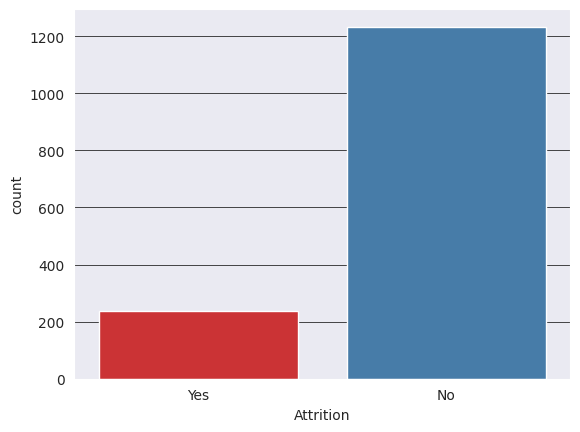

In [69]:
sns.set_style("darkgrid")
sns.countplot(x='Attrition',data=df,palette='Set1',hue='Attrition')
plt.grid(color='black', linewidth=0.5,axis='y')

In [70]:
columns=['Department','EducationField','JobRole','BusinessTravel','MaritalStatus']
for col in columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)

df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})
df['Over18']=df['Over18'].map({'Y':1,'N':0})
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [71]:
df.shape

(1470, 49)

In [72]:
df.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1,inplace=True)

In [73]:
X = df.drop('Attrition', axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [26]:
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

,count
Attrition,
0,986
1,986


In [43]:
pca=PCA(0.98)
X_train_pca=pca.fit_transform(X_train)
X_train_pca=pd.DataFrame(X_train_pca)
X_test_pca=pca.transform(X_test)

In [47]:
X_train_pca.shape,X_test_pca.shape

((1972, 2), (294, 2))

Decision trees do not benefit from the linear combinations(PCA)

They prefer raw features

In [55]:
tree_clf = DecisionTreeClassifier(random_state=42,class_weight='balanced')
tree_clf.fit(X_train, y_train)
y_pred=tree_clf.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:\n ",classification_report(y_test,y_pred))

Accuracy : 0.7040816326530612

Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.77      0.81       247
           1       0.23      0.36      0.28        47

    accuracy                           0.70       294
   macro avg       0.55      0.57      0.55       294
weighted avg       0.76      0.70      0.73       294



In [104]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="accuracy",
    n_jobs=-1,
    cv=5
)

tree_cv.fit(X_train, y_train)

y_pred=tree_cv.predict(X_test)
print("Best Parameters:", tree_cv.best_params_)
print("Best Cross-Validation Score:", tree_cv.best_score_)
print("Test Accuracy:", tree_cv.score(X_test, y_test))
print("\nClassification Report:\n ",classification_report(y_test,y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 0.853746844572665
Test Accuracy: 0.8673469387755102


In [105]:
y_pred=tree_cv.predict(X_test)
print("\nClassification Report:\n ",classification_report(y_test,y_pred))


Classification Report:
                precision    recall  f1-score   support

           0       0.89      0.97      0.92       247
           1       0.67      0.34      0.45        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



In [92]:
best_params = tree_cv.best_params_
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=15, splitter='random')

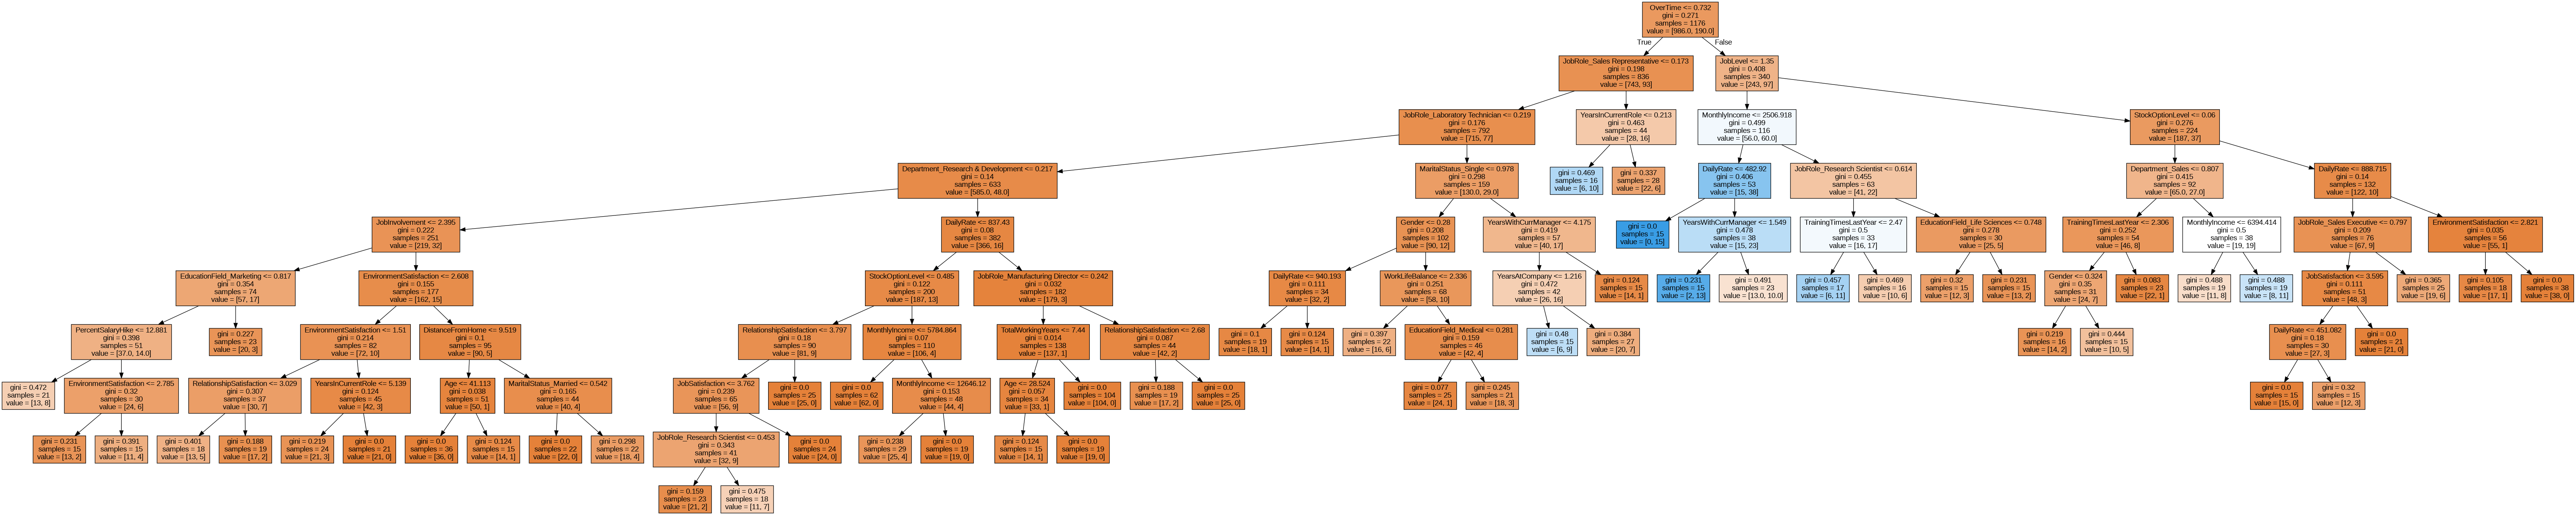

In [93]:
features = X_train.columns.tolist()
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

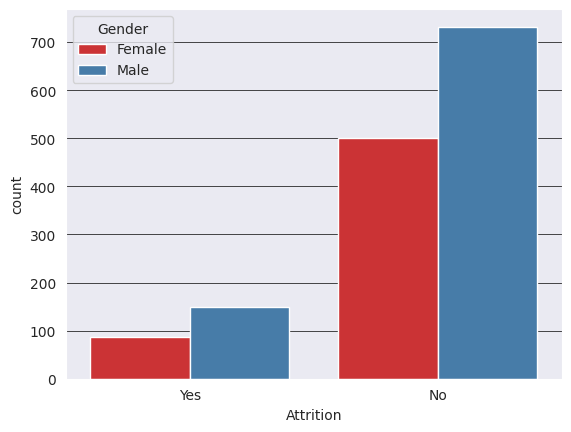

In [74]:
sns.countplot(x='Attrition',data=df2,palette='Set1',hue='Gender')
plt.grid(axis='y', color='black', linewidth=0.5)

Male workers tend to leave the company more

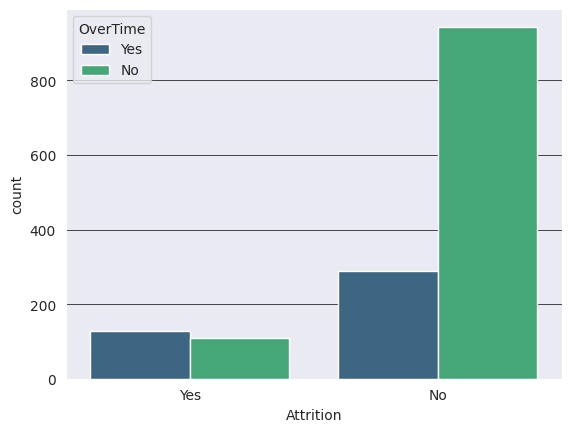

In [76]:
sns.countplot(x='Attrition',data=df2,palette='viridis',hue='OverTime')
plt.grid(axis='y', color='black', linewidth=0.5)

Those who overtime have higher tendency to leave the company

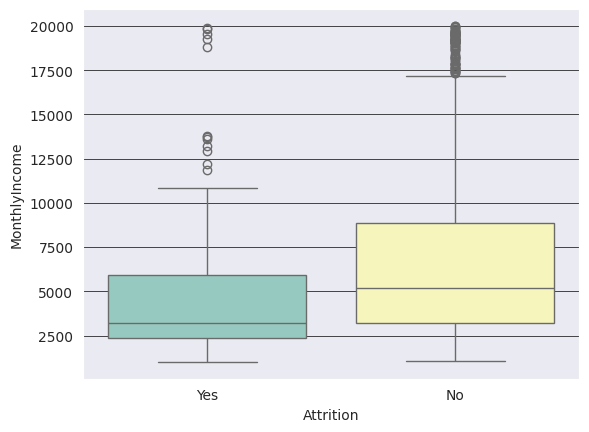

In [127]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df2,palette='Set3')
plt.grid(axis='y', color='black', linewidth=0.5)

The monthly income of those who left the company was less than others who retained

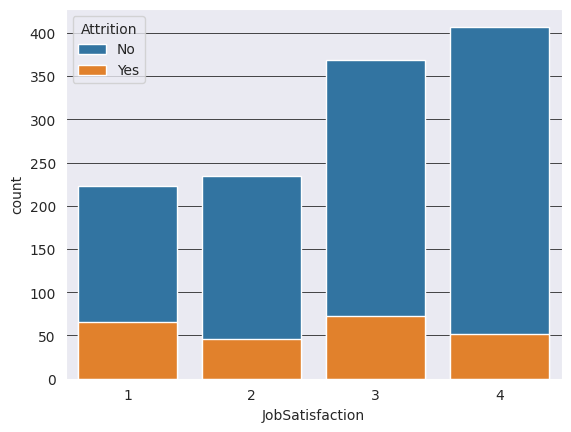

In [134]:
sns.countplot(x='JobSatisfaction',data=df2,palette='tab10',hue='Attrition', dodge=False)
plt.grid(axis='y', color='black', linewidth=0.5)
plt.show()

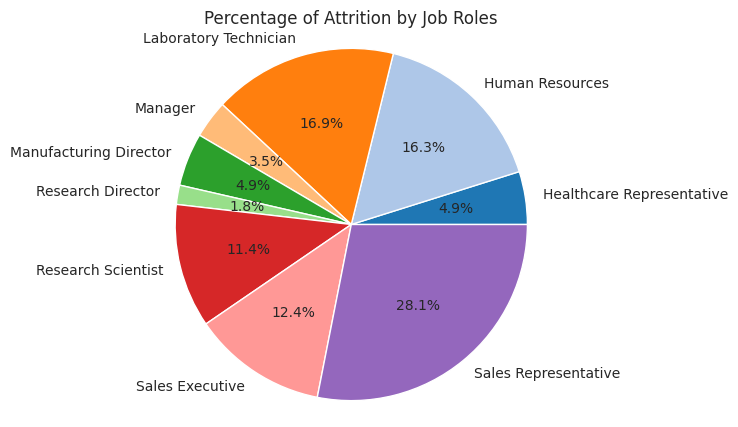

In [150]:
department_attrition_counts = df2.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_percentage_by_department = department_attrition_counts['Yes'] * 100

plt.figure(figsize=(5, 5))
plt.pie(attrition_percentage_by_department, labels=attrition_percentage_by_department.index, autopct='%1.1f%%', startangle=0, colors=sns.color_palette('tab20'))
plt.title('Percentage of Attrition by Job Roles')
plt.axis('equal')
plt.show()

Most attritions are from people with Sales Representative role

In [96]:
tree_clf = RandomForestClassifier(random_state=42,class_weight='balanced')
tree_clf.fit(X_train, y_train)
y_pred=tree_clf.predict(X_test)
print("Accuracy :" ,accuracy_score(y_test, y_pred))
print("\nClassification Report:\n ",classification_report(y_test,y_pred))

Accuracy : 0.8367346938775511

Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



In [107]:
params = {
    "n_estimators": [50, 100, 150],
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 21, 5)),
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}
rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(
    rf_clf,
    params,
    scoring="accuracy",
    n_jobs=-1,
    cv=5
)

rf_cv.fit(X_train, y_train)

y_pred=rf_cv.predict(X_test)
print("Best Parameters:", rf_cv.best_params_)
print("Best Cross-Validation Score:", rf_cv.best_score_)
print("Test Accuracy:", rf_cv.score(X_test, y_test))
print("\nClassification Report:\n ",classification_report(y_test,y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
Best Cross-Validation Score: 0.3436917844060701
Test Accuracy: 0.1694915254237288

Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



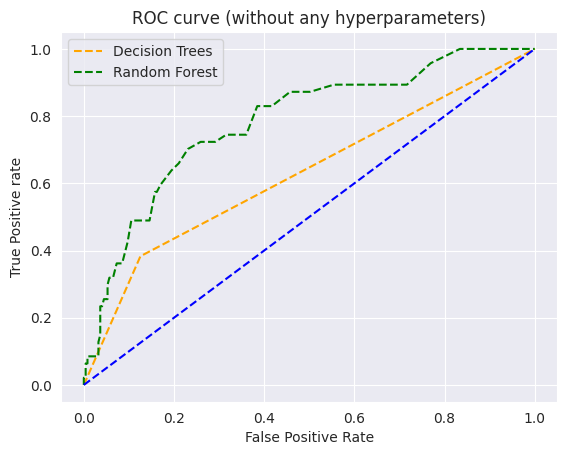

AUC score for Decision Trees 0.6287363252648808
AUC score for Random Forest 0.7822809888879317


In [106]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model1.fit(X_train, y_train)
model2.fit(X_train,y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Trees')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve (without any hyperparameters)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print("AUC score for Decision Trees",auc_score1)
print("AUC score for Random Forest",auc_score2)

Random Forest outperforms Decision Trees in accuracy as they an ensemble of decision trees and their final prediction is an aggregate of output of many decision trees. They help reduce overfiting